# Second order tracker simulation

### Importing the packages and the class definition function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import main_urnings as mu

### Setting up a simulation and the game environment

In [3]:
#game settings
n_player = 1
n_items = 50
starting_score = 50
player_urn_sizes = 100
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.8, so_score=10)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

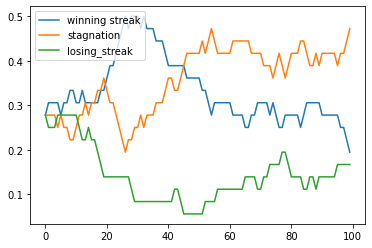

In [4]:
so_results = np.reshape(player.so_container, (int(len(player.so_container)/3), 3)) / 36

plt.plot(so_results[:100,0], label = "winning streak")
plt.plot(so_results[:100,1], label = "stagnation")
plt.plot(so_results[:100,2], label = "losing_streak")
plt.legend()

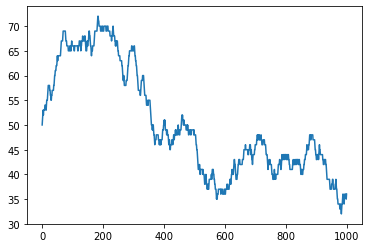

In [10]:
plt.plot(player.container)

### Discrete jumps in ability

In [43]:
#game settings
n_player = 1
n_items = 50
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.8, so_score=6)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = starting_score * 10, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=100)

player.true_value = 0.9

adaptive_sim.play(n_games=100)

player.true_value = 0.5

adaptive_sim.play(n_games=100)

player.true_value = 0.3

adaptive_sim.play(n_games=200)

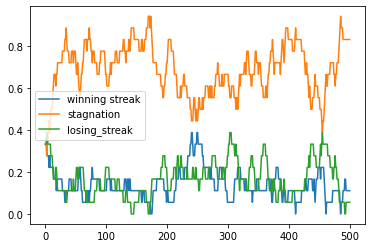

In [44]:
so_results = np.reshape(player.so_container, (int(len(player.so_container)/3), 3)) / player.so_urn_size

plt.plot(so_results[:,0], label = "winning streak")
plt.plot(so_results[:,1], label = "stagnation")
plt.plot(so_results[:,2], label = "losing_streak")
plt.legend()



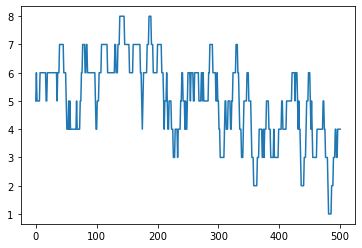

In [45]:
plt.plot(player.container)